<a href="https://colab.research.google.com/github/suhailmk9/Hotel-booking-Analysis/blob/main/EDA_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOTEL BOOKING ANALYSIS  

Word "HOTEL" as we are familiar with this word and come across with this word very often.What does HOTEL mean? a hotel is a  building where travelers can pay for lodging and meals and other service.
The hospitality industry is one of the blooming industry all over the world.
Hotel operations vary in size, function, complexity, and cost. Most hotels and major hospitality companies have set industry standards to classify hotel types. An upscale full-service hotel facility offers luxury amenities, full-service accommodations, an on-site restaurant, and the highest level of personalized service Small, lower-priced hotels may offer only the most basic guest services and facilities.
so in this project we are going to look into the given data and try to analyze it.
here we have data for two types of hotels city hotel and resort hotel from the different countries along the guest list and the average daily price.


### Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

###Importing the csv file.###

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/almabetter practice data/Hotel Bookings.csv'
df=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Basic Info of data###

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [ ]:
#checking the number of rows and columns
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


###Checking for null values in the data###

In [ ]:
#finding the column that have null values 
null_values = pd.DataFrame({'Null_Values' : df.isna().sum(), 'Percentage_Null_Values' : round((df.isna().sum()) / (df.shape[0]) * (100),2)})
null_values

,Null_Values,Percentage_Null_Values
hotel,0,0.00
is_canceled,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00


Here we can see the agent and company columns has more number of null values which might affect our analysis

###Droping the columns


In [ ]:
df.drop(['agent','company'],axis= 1,inplace= True)     #drop unnecessary coulmn

So we are dropping the agent and company columns.

###Filling the columns with na values.###

In [ ]:
#For missing values in country column,replace it with mode (value that appears most)
df["country"].fillna(df.country.mode().to_string(),inplace =True)

#for missing children values,replace it with mean value 
df["children"].fillna(round(df.children.mean()),inplace = True)

df = df.dropna(axis = 0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Here we are replacing the na country cell with mode and children with mean.
And finally we have done it and there is no na values in our data. 

###Checking for duplicates value###

In [ ]:
#check for duplicate data
duplicate = df.duplicated()
print(duplicate.value_counts())

False    87370
True     32020
dtype: int64


There are 31994 duplicate values.

In [ ]:
#drop duplicate rows- if any
df.drop_duplicates(inplace= True)

In [ ]:
#check for duplicate data again
df.duplicated().sum()

0

As we can see there is no duplicate values in our data.

###Identifying continuous and categorical columns###

In [ ]:
def var(df):
    unique_list_of_col = pd.DataFrame([[i,len(df[i].unique())] for i in df.columns]) #to get the number of unique rows
    unique_list_of_col.columns = ['names','uniques']

    cat_var = set(unique_list_of_col.names[(unique_list_of_col.uniques<=12)  | 
                                   (unique_list_of_col.names=='country')                                  
                                  ]) #if the number of unique rows is less than 12 then it is categorical variable
    total_var = set(df.columns)   #using set for distinct columns
    con_var = total_var - cat_var  #to get continuous variable
    
    return cat_var, con_var


cat_var, con_var = var(df)

print("Continuous Variables is (",len(con_var),"):\n",con_var,'\n\n'
       "Categorical Variables is (",len(cat_var),"):\n",cat_var)

Continuous Variables is ( 12 ):
 {'lead_time', 'days_in_waiting_list', 'booking_changes', 'previous_bookings_not_canceled', 'adults', 'arrival_date_week_number', 'adr', 'previous_cancellations', 'reservation_status_date', 'stays_in_week_nights', 'stays_in_weekend_nights', 'arrival_date_day_of_month'} 

Categorical Variables is ( 18 ):
 {'assigned_room_type', 'is_canceled', 'reserved_room_type', 'total_of_special_requests', 'deposit_type', 'arrival_date_year', 'hotel', 'children', 'required_car_parking_spaces', 'is_repeated_guest', 'arrival_date_month', 'market_segment', 'distribution_channel', 'meal', 'babies', 'reservation_status', 'customer_type', 'country'}


Here we have classified the continuous and categorical columns.
So the question may pop in your mind what is continuous an catogrical,so
***Categorical data***: Categorical data represent characteristics such as a person's gender, marital status, hometown, or the types of movies they like. Categorical data can take on numerical values (such as “1” indicating male and “2” indicating female), but those numbers don't have mathematical meaning.

***continuous data***  :continuous is quantitative data that can be measured. • it has an infinite number of possible values within. a selected range e.g. temperature range. discrete data. • discrete data is quantitative data that can be counted.

###Checking for the outliars###


An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

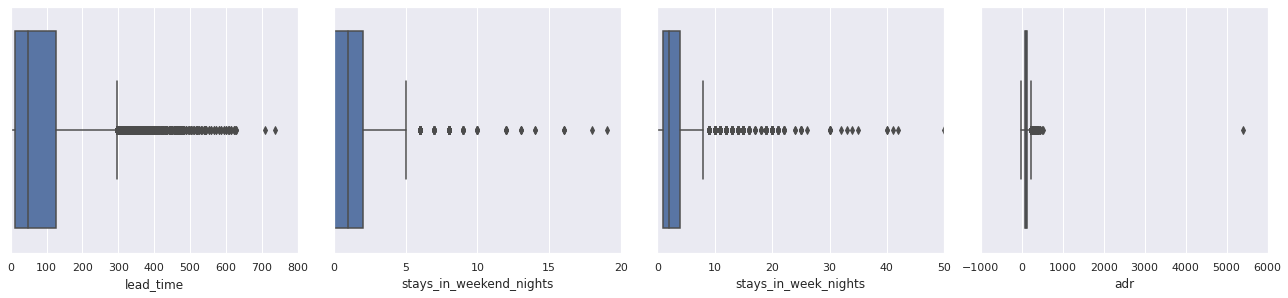

In [ ]:
features = ["lead_time","stays_in_weekend_nights" ,"stays_in_week_nights","adr"]
n = 1
plt.figure(figsize=(18,16))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(df[feature])
    n+=1
    plt.tight_layout()

There is outliars in the data

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 - Q1) is called the interquartile range or IQR.

In [ ]:
#Checking outliers in continuous variables
df[con_var].describe()

,lead_time,days_in_waiting_list,booking_changes,previous_bookings_not_canceled,adults,arrival_date_week_number,adr,previous_cancellations,stays_in_week_nights,stays_in_weekend_nights,arrival_date_day_of_month
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,79.900595,0.749788,0.271661,0.184045,1.875873,26.838549,106.343157,0.030422,2.625604,1.005414,15.815967
std,86.055086,10.017213,0.727331,1.732148,0.626521,13.674188,55.016143,0.369200,2.053693,1.031980,8.835216
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.380000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,0.000000,0.000000,0.000000,2.000000,16.000000,72.000000,0.000000,1.000000,0.000000,8.000000
50%,49.000000,0.000000,0.000000,0.000000,2.000000,27.000000,98.100000,0.000000,2.000000,1.000000,16.000000
75%,125.000000,0.000000,0.000000,0.000000,2.000000,37.000000,134.000000,0.000000,4.000000,2.000000,23.000000
max,737.000000,391.000000,21.000000,72.000000,55.000000,53.000000,5400.000000,26.000000,50.000000,19.000000,31.000000


###Imputing the outliars###

Here we are replacing the outliers with interquartile range(IQR)
IQR = (Q1-Q3)
where the Q1 is 25 percentiles and Q3 is 75 percentiles.

In [ ]:
def remove_outlier_using_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final_output = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final_output

In [ ]:
df["lead_time"] = remove_outlier_using_IQR(df["lead_time"])
df["stays_in_weekend_nights"] = remove_outlier_using_IQR(df["stays_in_weekend_nights"])
df["stays_in_week_nights"]= remove_outlier_using_IQR(df["stays_in_week_nights"])
df["adr"] = remove_outlier_using_IQR(df["adr"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

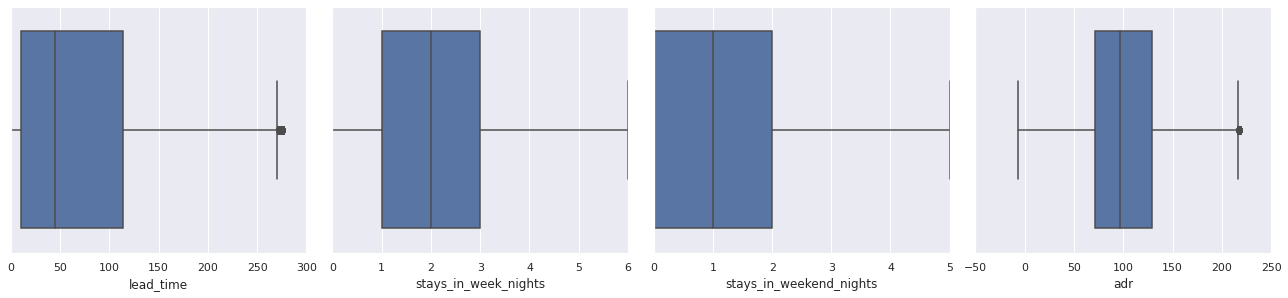

In [ ]:
features = ["lead_time","stays_in_week_nights","stays_in_weekend_nights","adr"]
n = 1
plt.figure(figsize=(18,16))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(df[feature])
    n+=1
    plt.tight_layout()

In [ ]:
df.loc[df.days_in_waiting_list >  0,"days_in_waiting_list"]=  1
df.loc[df. booking_changes > 5,"booking_changes"]=  5
df.loc[df.previous_bookings_not_canceled >   0,"previous_bookings_not_canceled"]=  1
df.loc[df.previous_cancellations >  0,"previous_cancellations "]=  1

# List of Continuous Variables which should be Categorical- PrevBook,PrevCancel,days in waiting list

cat_var = set(list(cat_var) + ["previous_bookings_not_canceled","previous_cancellations","days_in_waiting_list"])
con_var = set(df.columns) - cat_var

In [ ]:
df[con_var].describe()

,lead_time,booking_changes,adults,arrival_date_week_number,adr,stays_in_week_nights,stays_in_weekend_nights,arrival_date_day_of_month,previous_cancellations
count,84098.000000,87370.000000,87370.000000,87370.000000,84253.000000,84259.000000,87150.000000,87370.000000,1685.0
mean,70.007313,0.266339,1.875873,26.838549,100.884531,2.379461,0.989191,15.815967,1.0
std,70.390158,0.666664,0.626521,13.674188,44.160362,1.507521,0.975105,8.835216,0.0
min,0.000000,0.000000,0.000000,1.000000,-6.380000,0.000000,0.000000,1.000000,1.0
25%,10.000000,0.000000,2.000000,16.000000,71.000000,1.000000,0.000000,8.000000,1.0
50%,45.000000,0.000000,2.000000,27.000000,96.300000,2.000000,1.000000,16.000000,1.0
75%,114.000000,0.000000,2.000000,37.000000,129.000000,3.000000,2.000000,23.000000,1.0
max,276.000000,5.000000,55.000000,53.000000,218.330000,6.000000,5.000000,31.000000,1.0


Now we have imputed the outliers

###Univariate variable analysis### 

So what is univariate analysis? Univariate analysis is a basic kind of analysis technique for statistical data. Here the data contains just one variable and does not have to deal with the relationship of a cause and effect.
The main objective of the univariate analysis is to describe the data in order to find out the patterns in the data. This is done by looking at the mean, mode, median, standard deviation, dispersion, etc.

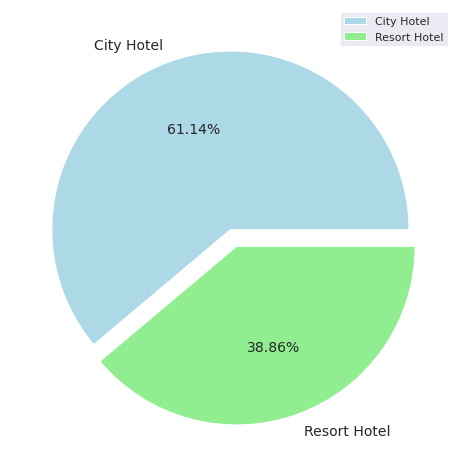

In [ ]:
#Checking which hotelhas more reservations
plt.rcParams['figure.figsize'] = 8,8
# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0,0.1)

# Determine colour of pie chart
colors = ['lightblue','lightgreen']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', textprops={'fontsize': 14})
plt.legend()

which guest canceled the hotel stay.

Text(0.5, 1.0, 'Hotel Cancelations')

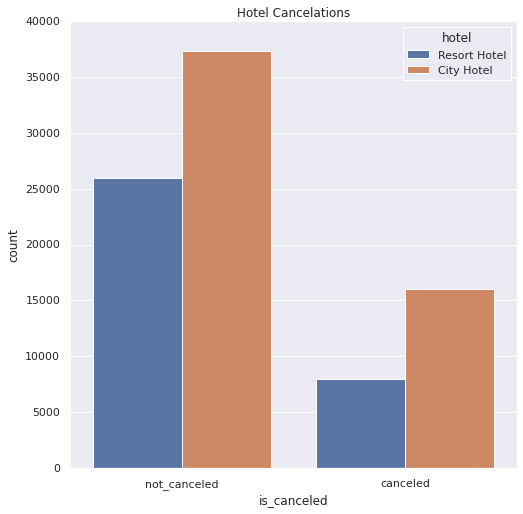

In [ ]:
df['is_canceled']= df.is_canceled.replace([1,0], ['canceled','not_canceled'])
sns.countplot(x='is_canceled',hue='hotel',data=df)
plt.title("Hotel Cancelations")

In which month the more guest arrived?

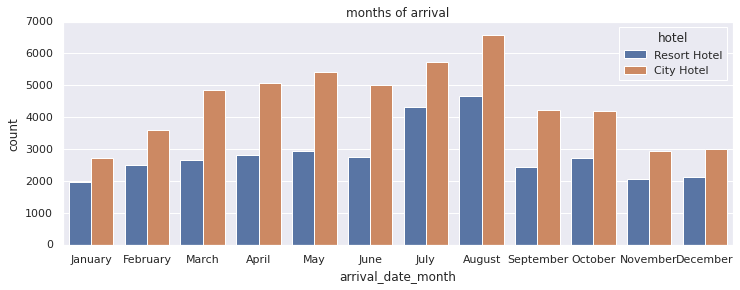

In [ ]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month',hue='hotel',order=month,data=df)
plt.title('months of arrival')
plt.show()

Here we can see the in august month has more guest arrived.

which  year has most guest ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Arrival years')

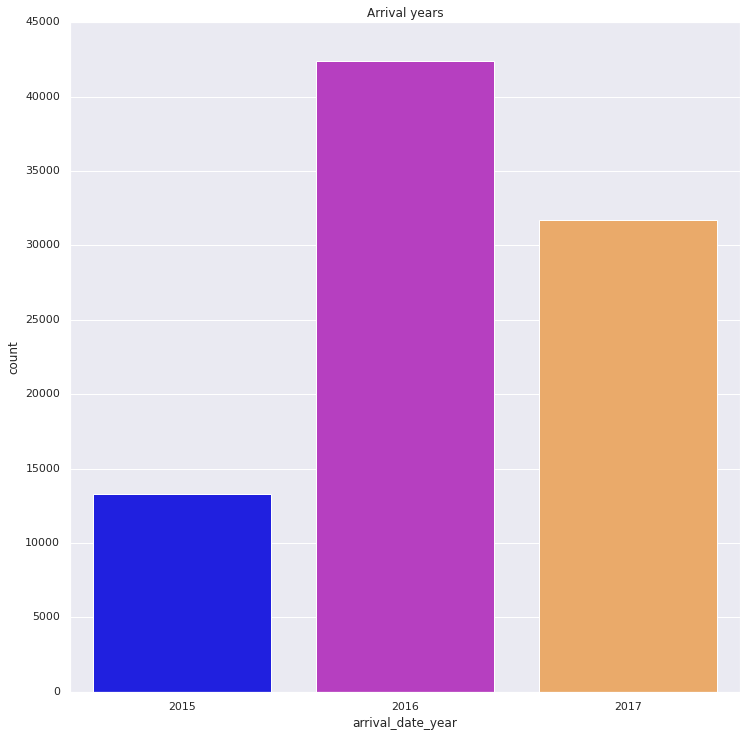

In [ ]:
df["arrival_date_year"].value_counts
plt.figure(figsize=(12,12))
sns.countplot(df["arrival_date_year"], palette="gnuplot2")
plt.title("Arrival years")

Here we can see the 2016 has more most then 2015 and 2017.

How the most of guest made booking? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


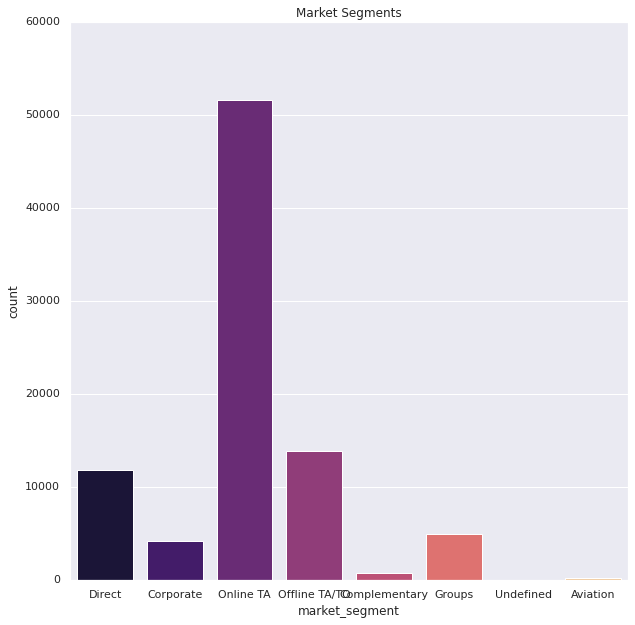

In [ ]:
df["market_segment"].value_counts 
plt.figure(figsize=(10,10))
sns.countplot(df["market_segment"], palette='magma')
plt.title("Market Segments")
plt.show()

Here most of the guest made booking through omnline travel agent.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


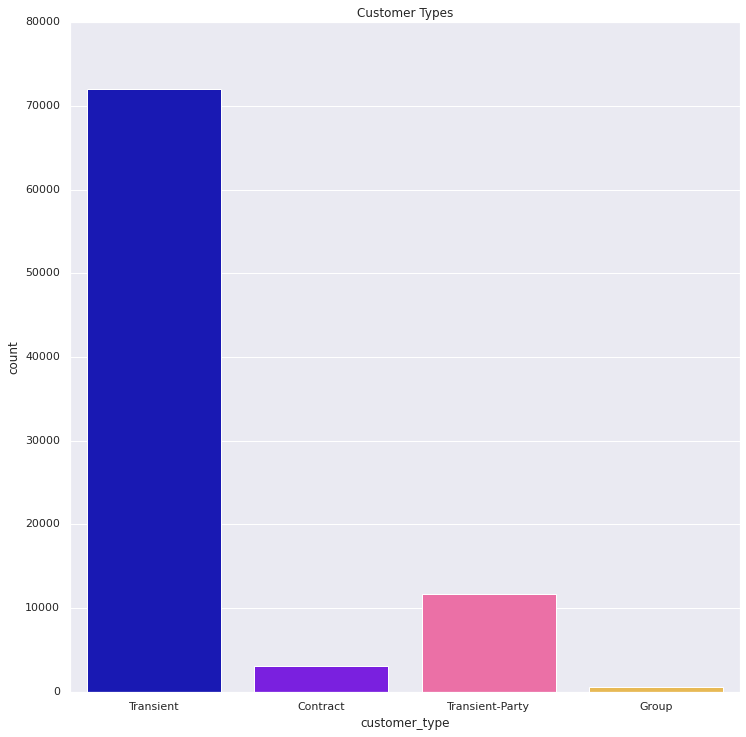

In [ ]:
df["customer_type"].value_counts
plt.figure(figsize=(12,12))
sns.countplot(df["customer_type"], palette="gnuplot2")
plt.title("Customer Types")
plt.show()

In [ ]:
df["distribution_channel"].value_counts()

TA/TO        69123
Direct       12986
Corporate     5075
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

###Price analysis###

Price is the one of the main factor for hotel booking.
So in this part we try to look into price part and check how the price changes year by year. And  how it affect our guest. 

In [ ]:
df1= df.groupby("hotel").adr.agg(np.average)
df1

The average adr for sity hotel is 110.99 and of resort hotel is 99.10

In [ ]:
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
# here we are not including because there age is less than 3 and so there stay is free 
actual_guests = df.loc[df["is_canceled"] == '0']
Total_Stay = actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights']
actual_guests['price'] = actual_guests['adr'] * (Total_Stay)

In [ ]:
df2 = df.groupby("assigned_room_type") .adr.agg(np.average) 
df2

Here we are trying to find the average adr for each type of room. 

In [ ]:
df["arrival_date_month_year"]=df["arrival_date_month"].astype("str")+" "+df["arrival_date_year"].astype("str")
df.groupby("arrival_date_month_year").agg(np.average)["adr"].reset_index()


,arrival_date_month_year,adr
0,April 2016,90.972653
1,April 2017,115.128432
2,August 2015,122.994391
3,August 2016,148.833968
4,August 2017,168.549327
5,December 2015,71.540293
6,December 2016,87.687599
7,February 2016,69.931764
8,February 2017,78.749541
9,January 2016,62.698459


Here  we trying to find the average adr of each month for each year.

In [ ]:
df["Total_guest"] = df["babies"] +df['adults'] + df['children']
df.groupby("arrival_date_month_year").sum()["Total_guest"]


arrival_date_month_year
April 2016        10471.0
April 2017        11529.0
August 2015        8040.0
August 2016       11600.0
August 2017       11131.0
December 2015      5470.0
December 2016      7726.0
February 2016      7215.0
February 2017      8084.0
January 2016       3835.0
January 2017       6689.0
July 2015          5715.0
July 2016         10101.0
July 2017         11791.0
June 2016         10101.0
June 2017         11380.0
March 2016         9261.0
March 2017         9171.0
May 2016          10420.0
May 2017          12036.0
November 2015      3807.0
November 2016      8005.0
October 2015       9084.0
October 2016      11960.0
September 2015     9726.0
September 2016    10640.0
Name: Total_guest, dtype: float64

This code display the total number of guest arrived each month in each year. 

###Bivariate Analysis###

When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables we try to check the relation between them.

Here trying to find the relation between lead time and booking changes.

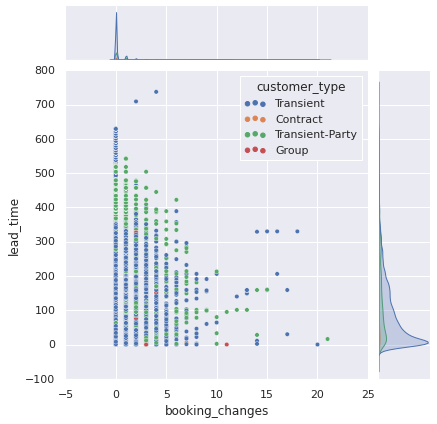

In [ ]:
sns.jointplot(data = df,x= "booking_changes",y="lead_time" ,hue ="customer_type" )


From graph maximum number of booking not change by Transient customer and most of ChangeBooking done by Transient-party.



Here we are analyzing the relation between Hotels and previous booking not canceled

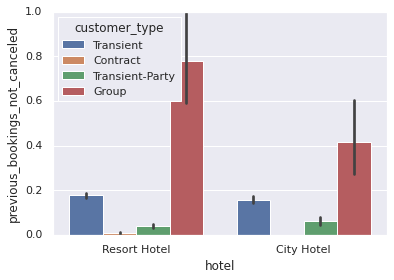

In [ ]:
sns.barplot(data  = df, x="hotel", y="previous_bookings_not_canceled",hue ="customer_type")

Both hotel have maximum Previous Booking done by group,followed by transient and transient-party and very less previous booking done by contract

#Hypothesis Questions

**Does market segment have any impact on repeated guest?**

In [ ]:
df=  pd.read_csv('Hotel Bookings.csv')

In [ ]:
# Does market segment have any impact on repeated guest
new_data=df.groupby(['market_segment','is_repeated_guest']).size().reset_index(name='count')
new_data

,market_segment,is_repeated_guest,count
0,Aviation,0,173
1,Aviation,1,64
2,Complementary,0,513
3,Complementary,1,230
4,Corporate,0,3821
5,Corporate,1,1474
6,Direct,0,11810
7,Direct,1,796
8,Groups,0,19541
9,Groups,1,270


In [ ]:
new_data_1=pd.DataFrame(df.market_segment.value_counts())
new_data_1.reset_index(level=0, inplace=True)
new_data_1.rename(columns = {'index':'market_segment', 'market_segment':'total'}, inplace = True) 
new_data_1

,market_segment,total
0,Online TA,56477
1,Offline TA/TO,24219
2,Groups,19811
3,Direct,12606
4,Corporate,5295
5,Complementary,743
6,Aviation,237
7,Undefined,2


In [ ]:
# merging 2 table 
market_impact=new_data.merge(new_data_1, on='market_segment', how='left')
market_impact

,market_segment,is_repeated_guest,count,total
0,Aviation,0,173,237
1,Aviation,1,64,237
2,Complementary,0,513,743
3,Complementary,1,230,743
4,Corporate,0,3821,5295
5,Corporate,1,1474,5295
6,Direct,0,11810,12606
7,Direct,1,796,12606
8,Groups,0,19541,19811
9,Groups,1,270,19811


In [ ]:
market_impact['repeated_guest_market%']=(market_impact['count']/market_impact['total'])*100
market_impact

,market_segment,is_repeated_guest,count,total,repeated_guest_market%
0,Aviation,0,173,237,72.995781
1,Aviation,1,64,237,27.004219
2,Complementary,0,513,743,69.044415
3,Complementary,1,230,743,30.955585
4,Corporate,0,3821,5295,72.162417
5,Corporate,1,1474,5295,27.837583
6,Direct,0,11810,12606,93.685547
7,Direct,1,796,12606,6.314453
8,Groups,0,19541,19811,98.637121
9,Groups,1,270,19811,1.362879


In [ ]:
#Taking only where guest is repeated
market_impact= market_impact[market_impact['is_repeated_guest'] > 0]
market_impact

,market_segment,is_repeated_guest,count,total,repeated_guest_market%
1,Aviation,1,64,237,27.004219
3,Complementary,1,230,743,30.955585
5,Corporate,1,1474,5295,27.837583
7,Direct,1,796,12606,6.314453
9,Groups,1,270,19811,1.362879
11,Offline TA/TO,1,379,24219,1.564887
13,Online TA,1,597,56477,1.057067


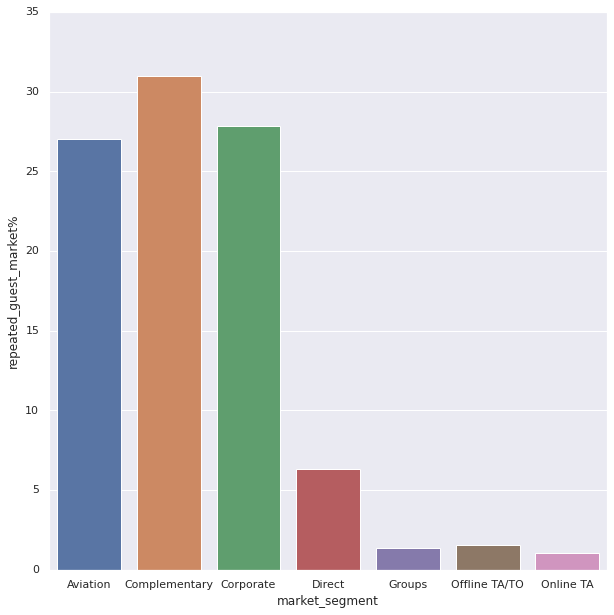

In [ ]:
 fig, axes = plt.subplots(1, 1, figsize=(10, 10))
_ = sns.barplot(y = 'repeated_guest_market%', x = 'market_segment', data =market_impact)

Here we can conclude that the complimentry market segment has more number of guest. 

***Is effect of coustmer types and reservation status?*** 

In [ ]:
# effect of customer_type & resevation_status
customer_data=df.groupby(['customer_type','reservation_status']).size().reset_index(name='count').sort_values(by='count',ascending=False)
customer_data

,customer_type,reservation_status,count
7,Transient,Check-Out,53099
6,Transient,Canceled,35557
10,Transient-Party,Check-Out,18735
9,Transient-Party,Canceled,6169
1,Contract,Check-Out,2814
0,Contract,Canceled,1236
8,Transient,No-Show,957
4,Group,Check-Out,518
11,Transient-Party,No-Show,220
3,Group,Canceled,55


In [ ]:
customer_total_data=pd.DataFrame(df.customer_type.value_counts())
customer_total_data.reset_index(level=0, inplace=True)
customer_total_data.rename(columns = {'index':'customer_type', 'customer_type':'total'}, inplace = True) 
customer_total_data

,customer_type,total
0,Transient,89613
1,Transient-Party,25124
2,Contract,4076
3,Group,577


In [ ]:
# merging 2 table
customer_data=customer_data.merge(customer_total_data, on='customer_type', how='left')
customer_data['customer_type_reservation%']=(customer_data['count']/customer_data['total'])*100
customer_data

,customer_type,reservation_status,count,total,customer_type_reservation%
0,Transient,Check-Out,53099,89613,59.253680
1,Transient,Canceled,35557,89613,39.678395
2,Transient-Party,Check-Out,18735,25124,74.570132
3,Transient-Party,Canceled,6169,25124,24.554211
4,Contract,Check-Out,2814,4076,69.038273
5,Contract,Canceled,1236,4076,30.323847
6,Transient,No-Show,957,89613,1.067925
7,Group,Check-Out,518,577,89.774697
8,Transient-Party,No-Show,220,25124,0.875657
9,Group,Canceled,55,577,9.532062


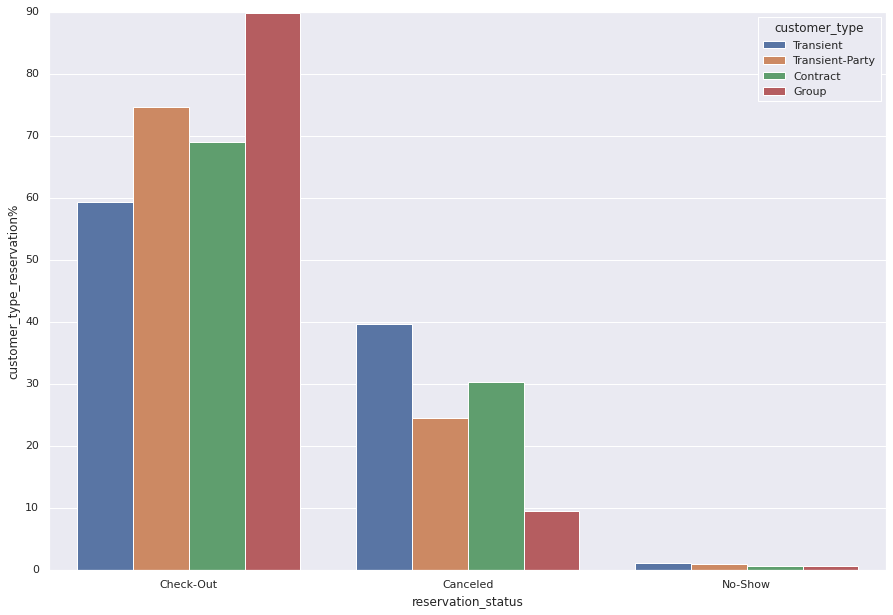

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x = 'reservation_status',y='customer_type_reservation%', data =customer_data , hue='customer_type')
plt.show()

We can conclude that customer type group has more number of guest and customer type transient has more number of cancelation

###correlation of our data###

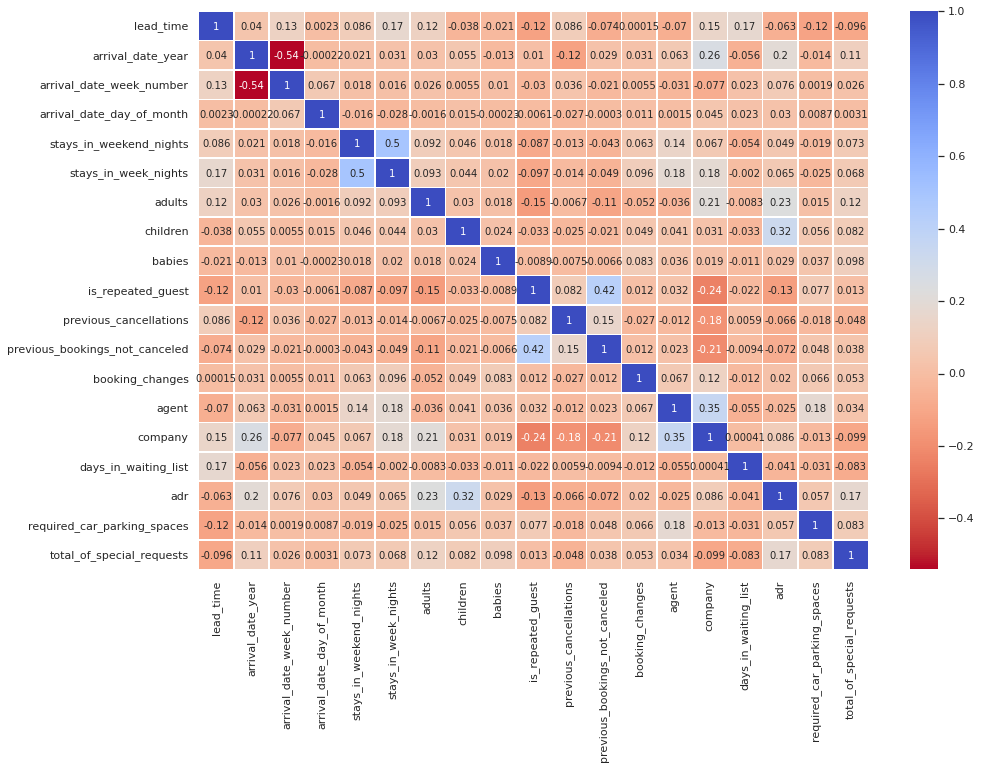

In [ ]:
#correlaton of our data
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot = True, linewidths=0.5,cmap = 'coolwarm_r')

Here we can see data is highly correlated with stay in week nights and stay in weekend nights.
There is negative correlation between ArrivingWeek and ArrivingYear.